In [70]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [71]:
# Min-max

from sklearn import preprocessing
import numpy as np

x = np.array([[ 0., -3., 1.],
             [ 3., 1., 2.],
              [0., 1., -1.]])
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
minmax_x = min_max_scaler.fit_transform(x)
print(minmax_x)

[[0.         0.         0.66666667]
 [1.         1.         1.        ]
 [0.         1.         0.        ]]


In [72]:
# Z-Score

from sklearn import preprocessing
import numpy as np

x = np.array([[ 0., -3., 1.],
             [ 3., 1., 2.],
             [ 0., 1., -1.]])

scaled_x = preprocessing.scale(x)
print(scaled_x)

[[-0.70710678 -1.41421356  0.26726124]
 [ 1.41421356  0.70710678  1.06904497]
 [-0.70710678  0.70710678 -1.33630621]]


In [73]:
#  Decimal scaling normalization

x = np.array([[ 0., -3., 1.],
             [3., 1., 2.],
             [0., 1., -1.]])

j = np.ceil(np.log10(np.max(abs(x))))
scaled_x = x/(10**j)
print(scaled_x)

[[ 0.  -0.3  0.1]
 [ 0.3  0.1  0.2]
 [ 0.   0.1 -0.1]]


In [74]:
print(test_data['Cabin'].value_counts())

B57 B59 B63 B66    3
C80                2
C89                2
C55 C57            2
F4                 2
                  ..
F33                1
B69                1
D19                1
B26                1
D30                1
Name: Cabin, Length: 76, dtype: int64


In [75]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_woman = sum(woman) / len(woman)
print("% of women who survived:", rate_women)


NameError: name 'woman' is not defined

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (6).

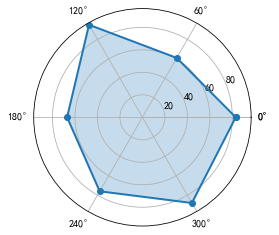

In [76]:
# Spider figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
# Prepare the data
labels = np.array([u"推进", "KDA", u"生存",u"团战",u"发育",u"输出"])
stats= [83, 61,95,67,76,88]
# prepare the data, angles, and conditional values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)
stats = np.concatenate((stats, [stats[0]]))
angles = np.concatenate((angles, [angles[0]]))
# Use Matplotlib to draw the spider figure
fig = plt.figure()
ax = fig.add_subplot(111, polar =True)
ax.plot(angles, stats, 'o-',linewidth = 2)
ax.fill(angles, stats, alpha= 0.25)
# set the chinese font
font = FontProperties(fname=r"C:\Windows\Fonts\simhei.ttf", size=14)
ax.set_thetagrids(angles * 180/np.pi, labels, FontProperties=font)
plt.show()

In [77]:
a = np.array([[4,3,2],[2,4,1]])
print (np.sort(a))
print (np.sort(a, axis=None))
print (np.sort(a, axis=0))
print (np.sort(a, axis=1))
np.sort(a, axis=1)

[[2 3 4]
 [1 2 4]]
[1 2 2 3 4 4]
[[2 3 1]
 [4 4 2]]
[[2 3 4]
 [1 2 4]]


array([[2, 3, 4],
       [1, 2, 4]])

In [78]:
a = np.array([4,3,2], [2,4,1])
print(a.sort( axis = 0))


TypeError: Field elements must be 2- or 3-tuples, got '2'

## CART Classification Tree

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [80]:
# Prepare data set
iris =load_iris()
# get the feature set and the classifer labels

features = iris.data
labels = iris.target

In [ ]:
# Randomly extract 33% data as test set, and the rest for training set.
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
# Create Classification tree
clf = DecisionTreeClassifier(criterion='gini')
# Construct the tree by importing the sample data
clf = clf.fit(train_features, train_labels)
# use CART to predict
test_predict = clf.predict(test_features)

score = accuracy_score(test_labels, test_predict)
print("accuracy: %.4lf" % score)



## Use CART regression tree to predict 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
# Prepare dataset
boston = load_boston()
print(boston.DESCR)
# Explore the data
print(boston.feature_names)

In [ ]:
boston.filename

In [11]:
print(boston.target)

NameError: name 'boston' is not defined

In [ ]:
print(boston.data)

In [ ]:
# Get the feature datasets and prices
features = boston.data
prices = boston.target

train_features, test_features, train_price, test_price = train_test_split(features, prices)

dtr = DecisionTreeRegressor()
dtr.fit(train_features, train_price)

predict_price = dtr.predict(test_features)

print(mean_squared_error(test_price, predict_price))
print(mean_absolute_error(test_price, predict_price))


## Practice with digits classifaction by CART

CART 分类树准确率 0.8444


'tree.pdf'

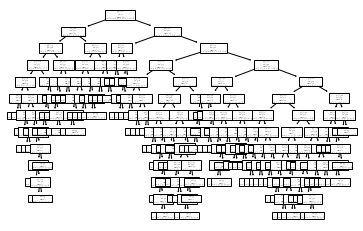

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_digits
# Prepare the figure of tree
from sklearn.tree import export_graphviz
import graphviz


digits = load_digits()
features = digits.data
labels = digits.target

train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

clf = DecisionTreeClassifier(criterion = 'gini')

clf = clf.fit(train_features, train_labels)
test_predict = clf.predict(test_features)

score = accuracy_score(test_labels, test_predict)
print("CART 分类树准确率 %.4lf" % score)
# draw the tree
dot_data = tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
tree.plot_tree(clf)
graph.render('tree')
graph.view('tree')

## Titanic with Decision Tree

In [13]:
clf = DecisionTreeClassifier(criterion='entropy')
print(clf)

DecisionTreeClassifier(criterion='entropy')


In [14]:
# Read the data from Github
import pandas as pd
train_data = pd.read_csv('https://raw.githubusercontent.com/cystanford/Titanic_Data/master/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/cystanford/Titanic_Data/master/test.csv')

In [15]:
# Explore the data
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [16]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [17]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
print(train_data.describe(include = ['O']))

                             Name   Sex  Ticket    Cabin Embarked
count                         891   891     891      204      889
unique                        891     2     681      147        3
top     Shutes, Miss. Elizabeth W  male  347082  B96 B98        S
freq                            1   577       7        4      644


In [19]:
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [20]:
print(train_data.tail())

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


## Cleaning the Data

In [21]:
# Fill out the NAN value for age column(a few loss data)
train_data['Age'].fillna(train_data['Age'].mean(), inplace =True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

# Fill out the NAN value for Fare column(a few loss data)
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace = True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)


In [22]:
print(train_data['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [23]:
# Fill out the Embarked NAN column with the most occurance value, which is S, 72%
train_data['Embarked'].fillna('S',inplace = True)
test_data['Embarked'].fillna('S',inplace=True)


## Feature Selection

In [24]:
# According to results of exploration, 
# 通过数据探索我们发现，PassengerId 为乘客编号，对分类没有作用，可以放弃；Name
# 为乘客姓名，对分类没有作用，可以放弃；Cabin 字段缺失值太多，可以放弃；Ticket 字
# 段为船票号码，杂乱无章且无规律，可以放弃。其余的字段包括：Pclass、Sex、Age、
# SibSp、Parch 和 Fare，这些属性分别表示了乘客的船票等级、性别、年龄、亲戚数量以
# 及船票价格，可能会和乘客的生存预测分类有关系。具体是什么关系，我们可以交给分类
# 器来处理

# Put the data columns into feature list
features = ['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]


In [25]:
# Deal with symbol to integers
from sklearn.feature_extraction import DictVectorizer
dvec = DictVectorizer(sparse =False)
train_features = dvec.fit_transform(train_features.to_dict('records'))
                                    
print(dvec.feature_names_)


['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


## Build the decision tree model

In [27]:
from sklearn.tree import DecisionTreeClassifier
#Construct the ID3 decision tree
clf = DecisionTreeClassifier(criterion='entropy')
# input the data to tree
clf.fit(train_features, train_labels)

DecisionTreeClassifier(criterion='entropy')

## Model Prediciton and Evaluation

In [28]:
test_features = dvec.transform(test_features.to_dict( 'records'))
# Prediction
pre_labels = clf.predict(test_features)

In [43]:
# Use the train_data as the validate data
acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(acc_decision_tree)

0.982043


In [48]:
# Use K corss validate the model score
import numpy as np
from sklearn.model_selection import cross_val_score

print(cross_val_score(clf, train_features, train_labels, cv=10))

[0.72222222 0.75280899 0.69662921 0.79775281 0.84269663 0.7752809
 0.80898876 0.73033708 0.85393258 0.84269663]


## Predict the Survival using Test Data 

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [52]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [58]:
test_data.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Ware, Mr. William Jeffery",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [59]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
test_data.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,30.27259,1,1,2668,22.3583,NaN,C


In [ ]:
features = ['Pclass', 'Sex', 'Age','SibSp','Parch','Fare','Embarked']

In [ ]:
test_features = test_data[features]
# test_labels = test_data['Survived'] don't have this column
test_labels = test_data[features]


<AxesSubplot:ylabel='Survived'>

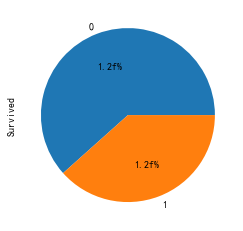

In [82]:
train_data['Survived'].value_counts().plot.pie(autopct='1.2f%%')

In [87]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64